In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot

pip install 'aif360[LawSchoolGPA]'


## Initialize Configs

In [5]:
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
EXPERIMENT_SESSION_UUID = '0c501743-e9d5-4c52-8d94-4e1e83fcd983'
SENSITIVE_ATTRS = ['male', 'race', 'male&race']
SENSITIVE_ATTR_FOR_INTERVENTION = 'male&race'
MODEL_NAMES = ['AdversarialDebiasing']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(19, 33)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,male_priv_correct,male_priv_incorrect,overall,race_dis,race_dis_correct,race_dis_incorrect,race_priv,race_priv_correct,race_priv_incorrect,Test_Set_Index
0,Accuracy,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'male&race...,Law_School,20,OK,2024-01-08 13:00:20.893,0c501743-e9d5-4c52-8d94-4e1e83fcd983,Exp_iter_1,100,...,1.000000,0.000000,0.894231,0.762073,1.000000,0.000000,0.920018,1.000000,0.000000,0
1,Aleatoric_Uncertainty,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'male&race...,Law_School,20,OK,2024-01-08 13:00:20.893,0c501743-e9d5-4c52-8d94-4e1e83fcd983,Exp_iter_1,100,...,0.244970,0.647878,0.282816,0.500401,0.434438,0.711678,0.240359,0.208509,0.606722,0
2,Epistemic_Uncertainty,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'male&race...,Law_School,20,OK,2024-01-08 13:00:20.893,0c501743-e9d5-4c52-8d94-4e1e83fcd983,Exp_iter_1,100,...,0.013305,0.037124,0.017018,0.042744,0.037709,0.058872,0.011998,0.010216,0.032494,0
3,F1,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'male&race...,Law_School,20,OK,2024-01-08 13:00:20.893,0c501743-e9d5-4c52-8d94-4e1e83fcd983,Exp_iter_1,100,...,1.000000,0.000000,0.942445,0.842187,1.000000,0.000000,0.957951,1.000000,0.000000,0
4,FNR,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'male&race...,Law_School,20,OK,2024-01-08 13:00:20.893,0c501743-e9d5-4c52-8d94-4e1e83fcd983,Exp_iter_1,100,...,0.000000,1.000000,0.021937,0.104651,0.000000,1.000000,0.009495,0.000000,1.000000,0
5,FPR,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'male&race...,Law_School,20,OK,2024-01-08 13:00:20.893,0c501743-e9d5-4c52-8d94-4e1e83fcd983,Exp_iter_1,100,...,0.000000,1.000000,0.753356,0.562753,0.000000,1.000000,0.888252,0.000000,1.000000,0
6,IQR,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'male&race...,Law_School,20,OK,2024-01-08 13:00:20.893,0c501743-e9d5-4c52-8d94-4e1e83fcd983,Exp_iter_1,100,...,0.035286,0.106298,0.044376,0.101757,0.088055,0.145642,0.033180,0.027672,0.096537,0
7,Jitter,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'male&race...,Law_School,20,OK,2024-01-08 13:00:20.893,0c501743-e9d5-4c52-8d94-4e1e83fcd983,Exp_iter_1,100,...,0.017601,0.131759,0.032070,0.102356,0.074717,0.190881,0.018355,0.010770,0.105611,0
8,Label_Stability,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'male&race...,Law_School,20,OK,2024-01-08 13:00:20.893,0c501743-e9d5-4c52-8d94-4e1e83fcd983,Exp_iter_1,100,...,0.976620,0.816724,0.956173,0.859246,0.897218,0.737624,0.975086,0.985786,0.852011,0
9,Mean_Prediction,AdversarialDebiasing,{'sensitive_attr_for_intervention': 'male&race...,Law_School,20,OK,2024-01-08 13:00:20.893,0c501743-e9d5-4c52-8d94-4e1e83fcd983,Exp_iter_1,100,...,0.081739,0.299243,0.102384,0.264100,0.222786,0.396428,0.070828,0.056212,0.238959,0


In [11]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [13]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [14]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

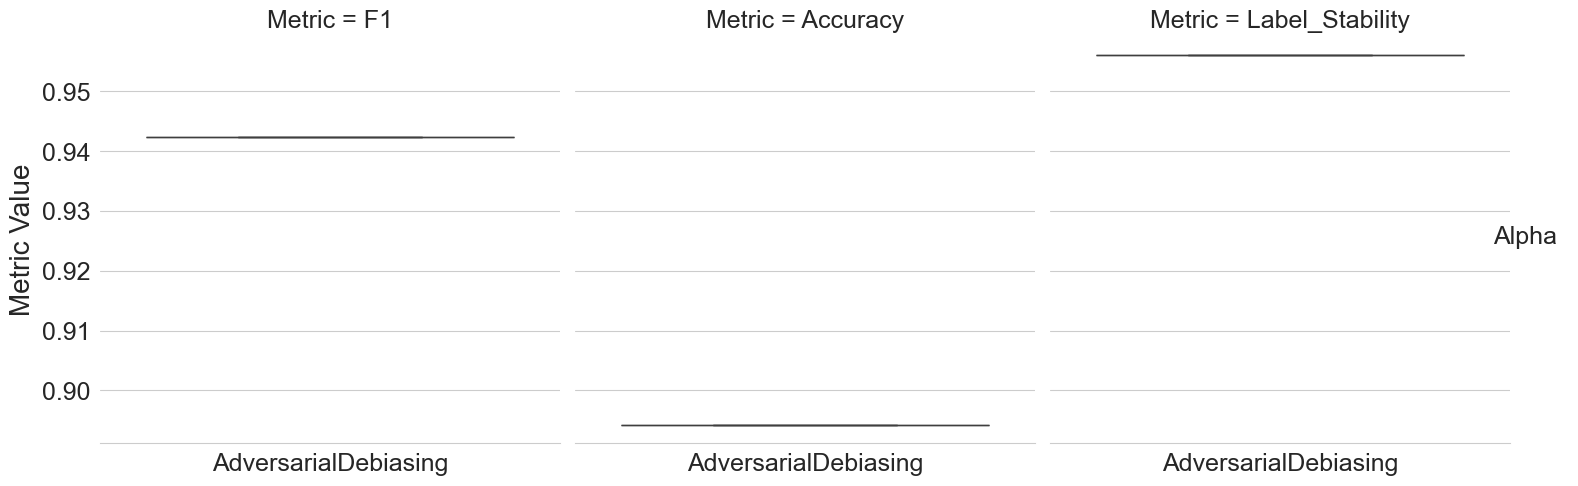

In [15]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           # ylim=(0.75, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

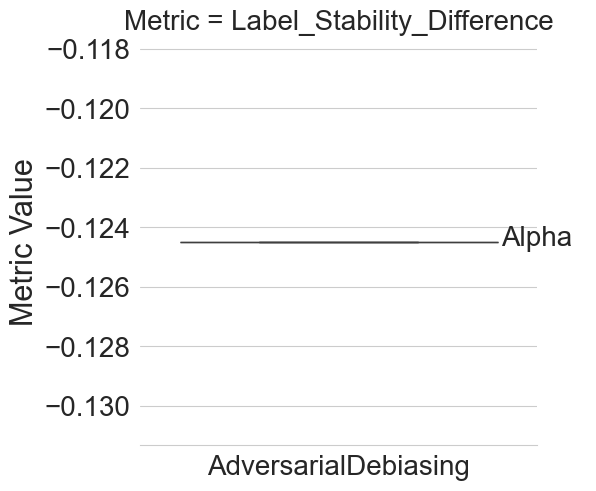

In [16]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Label_Stability_Difference'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

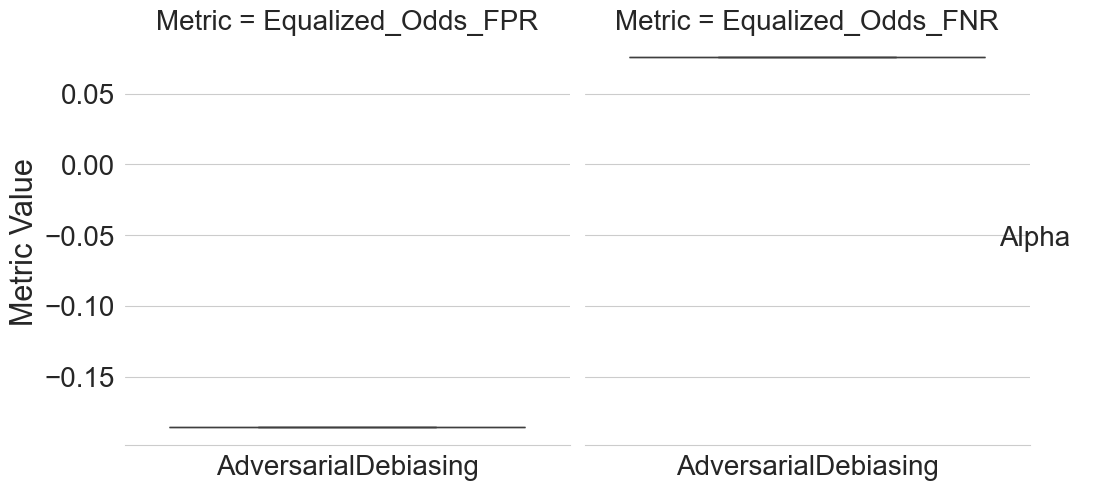

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

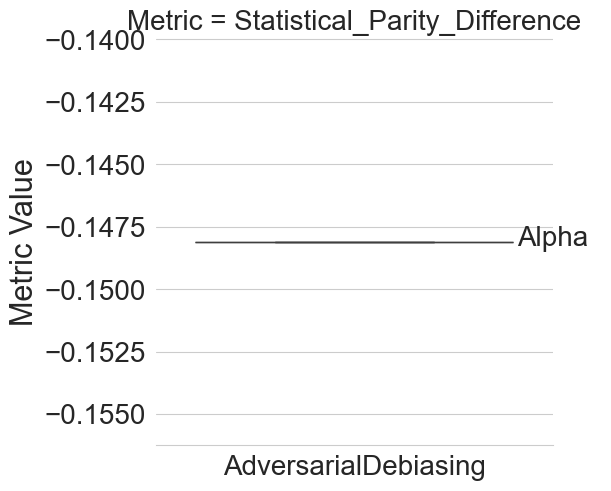

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group=SENSITIVE_ATTR_FOR_INTERVENTION,
                                           metric_names=['Statistical_Parity_Difference'],
                                           vals_to_replace=vals_to_replace)